In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt


In [2]:
microbiome_data = pd.read_csv('/content/genera.counts.tsv',delimiter='\t')
print(microbiome_data.head())


        Stage  \
0  Stage_I_II   
1     Healthy   
2     Healthy   
3     Healthy   
4     Healthy   

   d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Monoglobales;f__Firm-18;g__UBA1775  \
0                                                  0                                 
1                                                  0                                 
2                                                  0                                 
3                                                  0                                 
4                                                  0                                 

   d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Peptostreptococcales;f__Acidaminobacteraceae;g__Fusibacter_A  \
0                                                 47                                                           
1                                                162                                                           
2                                           

In [3]:
X = microbiome_data.drop(columns=['Stage'])  # Drop non-feature columns
y = microbiome_data['Stage']  # Target variable

In [4]:
print(microbiome_data.shape)

(346, 11945)


In [4]:
microbiome_data['Stage'] = microbiome_data['Stage'].apply(lambda x: 0 if x == 'Healthy' else 1)

scaler = StandardScaler()
microbiome_data_scaled = scaler.fit_transform(microbiome_data)

In [5]:
stage = microbiome_data['Stage'].values
print(stage)
full_data = pd.DataFrame(microbiome_data_scaled, columns=microbiome_data.columns)
full_data['Stage'] = stage
print(full_data.head())

[1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0
 1 0 0 0 1 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1 0 0 1 1 0 1 1 1 0 1 1 1 1 0 1 0 1
 1 1 1 1 0 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 1 1 0 1 1 1 1 0 0 1 1 0 1 1 0
 1 1 0 0 1 1 0 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1
 1 0 0 0 0 1 1 1 0 1 1 1 1 1 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0
 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1 0 0 1 1 0 1 1 1 1 0 0
 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 1 1
 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 0 1 0 1 1 1 1 0 1
 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 0 0 0 1 1 1 1
 1 1 0 1 1 1 1 0 0 1 1 0 1]
   Stage  \
0      1   
1      0   
2      0   
3      0   
4      0   

   d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Monoglobales;f__Firm-18;g__UBA1775  \
0                                          -0.258946                                 
1                                          -0.258946

In [6]:
# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    full_data.drop('Stage', axis=1),  # Features
    full_data['Stage'],  # Target
    test_size=0.2, random_state=42
)

In [7]:
# Initialize the logistic regression model
model = LogisticRegression(max_iter=1000)

# Fit the model on the training data
model.fit(X_train, y_train)

# Summary of model coefficients
print(model.coef_)

[[ 0.00716987 -0.02058253 -0.02201188 ...  0.          0.
   0.00892359]]


In [8]:
# Make predictions on test
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Probability estimates

# Evaluate the model using accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.6000


Confusion Matrix:
[[ 4 21]
 [ 7 38]]
AUC: 0.5351


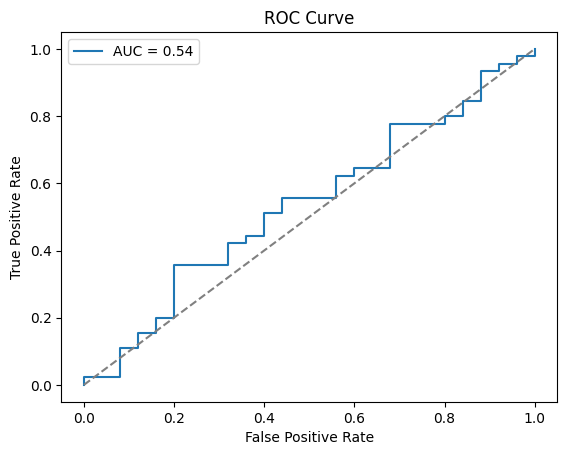

In [9]:
cm = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{cm}')

# ROC Curve and AUC
auc_score = roc_auc_score(y_test, y_prob)
print(f'AUC: {auc_score:.4f}')

# Plot ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()